In [1]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import instruments as inst
import numpy as np
import json

# Step 1: Setting up initial information

In [2]:
# Data path for processed csv
file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"
wavelengths = ["625-50", 610, "675-50", 670, "725-50", 720, "750-50", 760, 
    "775-50"]
obs_modes = ["IPOL", "MBI", "IPOL", "MBI", "IPOL", "MBI", "IPOL", "MBI", "IPOL"]
previous_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/"
save_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/"
em_gains = [1.139634, 1.230573943788524, 1.177732, 1.1946169522853136, 1.184177, 
    1.1968557857131294, 1.180120, 1.0798052820150867, 1.190700]
bounds = [ 
    (0, 2 * np.pi), # dichroic_retardance
    (0, 1), # dichroic_diattenuation
    (-90, 90), # dichroic_rotation_angle 
    (0.4 * 2 * np.pi, 0.6 * 2 * np.pi),  # delta_FLC
    (-5, 5),  # rot_FLC
    (0, 2 * np.pi),  # delta_opts
    (0, 1),  # epsilon_opts
    (-90, 90),  # rot_opts
    (0, 2 * np.pi),  # delta_derot
    (0, 2 * np.pi),  # delta_HWP
    (-5, 5),  # offset_HWP
    (-5, 5),  # theta_pol
]

# Step 2: Performing fits iteratively by wavelength - first broadband then MBI

{'dichroic': {'phi': 1.4602129402888262, 'epsilon': 0.004636540133101087, 'theta': 8.274834343812845}, 'flc': {'phi': 2.753722235091203, 'delta_theta': 4.998827609224682}, 'optics': {'phi': 0.2145608020807765, 'epsilon': 1.749711180649424e-08, 'theta': -70.95396868275728}, 'image_rotator': {'phi': 1.3583383162826719}, 'hwp': {'phi': 2.7444277853375203, 'delta_theta': -1.759830189043341}, 'lp': {'theta': 0.17251059724371326}}
[[0.49542796 0.49541898 0.00298333 0.        ]
 [0.49542796 0.49541898 0.00298333 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
logl value: 44.30791505646077


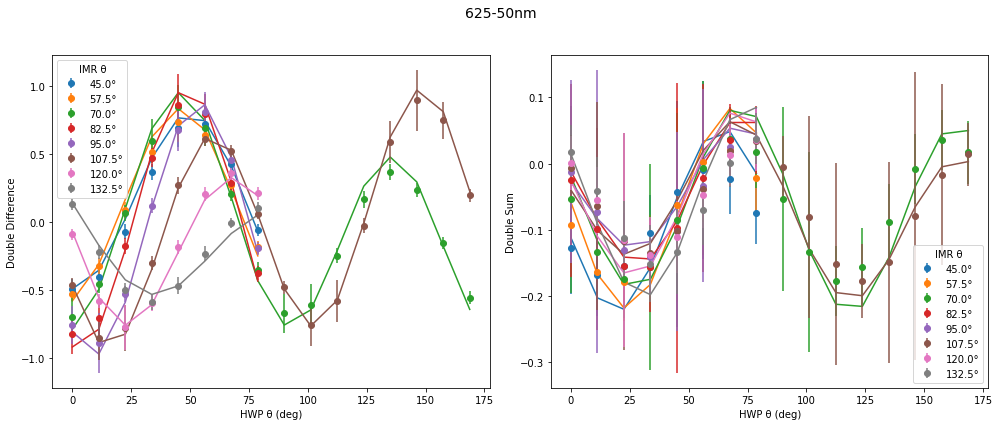

Before p0: {'dichroic': {'phi': 1.4602129402888262, 'epsilon': 0.004636540133101087, 'theta': 8.274834343812845}, 'flc': {'phi': 2.753722235091203, 'delta_theta': 4.998827609224682}, 'optics': {'phi': 0.2145608020807765, 'epsilon': 1.749711180649424e-08, 'theta': -70.95396868275728}, 'image_rotator': {'phi': 1.3583383162826719}, 'hwp': {'phi': 2.7444277853375203, 'delta_theta': -1.759830189043341}, 'lp': {'theta': 0.17251059724371326}}
Iteration #: 1
logl_value: 11.647997630307124
Best Fit Parameters: [ 9.32635842e-01  4.18107250e-03  4.87212560e+00  3.04633719e+00
  4.81622082e+00  2.57326036e-01  3.44456464e-08 -3.67108346e+01
  1.35835004e+00  2.74463124e+00 -1.77514482e+00  1.46645748e-01]


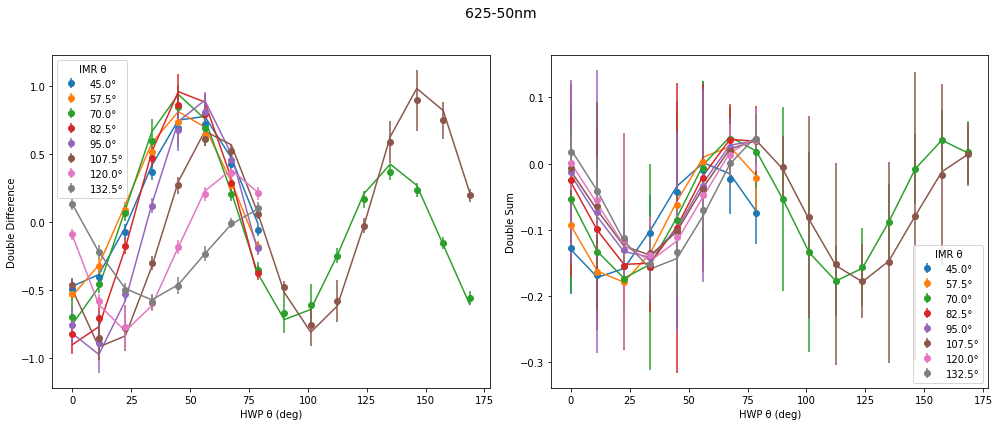

After p0: {'dichroic': {'phi': 0.9326358424643559, 'epsilon': 0.004181072500115977, 'theta': 4.872125601848367}, 'flc': {'phi': 3.0463371898314673, 'delta_theta': 4.816220820051392}, 'optics': {'phi': 0.2573260357086763, 'epsilon': 3.4445646449187795e-08, 'theta': -36.71083464434517}, 'image_rotator': {'phi': 1.3583500371065034}, 'hwp': {'phi': 2.7446312364146923, 'delta_theta': -1.7751448238255376}, 'lp': {'theta': 0.1466457478007569}}
Before p0: {'dichroic': {'phi': 0.9326358424643559, 'epsilon': 0.004181072500115977, 'theta': 4.872125601848367}, 'flc': {'phi': 3.0463371898314673, 'delta_theta': 4.816220820051392}, 'optics': {'phi': 0.2573260357086763, 'epsilon': 3.4445646449187795e-08, 'theta': -36.71083464434517}, 'image_rotator': {'phi': 1.3583500371065034}, 'hwp': {'phi': 2.7446312364146923, 'delta_theta': -1.7751448238255376}, 'lp': {'theta': 0.1466457478007569}}
Iteration #: 2
logl_value: 11.642064138417302
Best Fit Parameters: [ 7.49162906e-01  4.22247516e-03  6.80725275e+00  

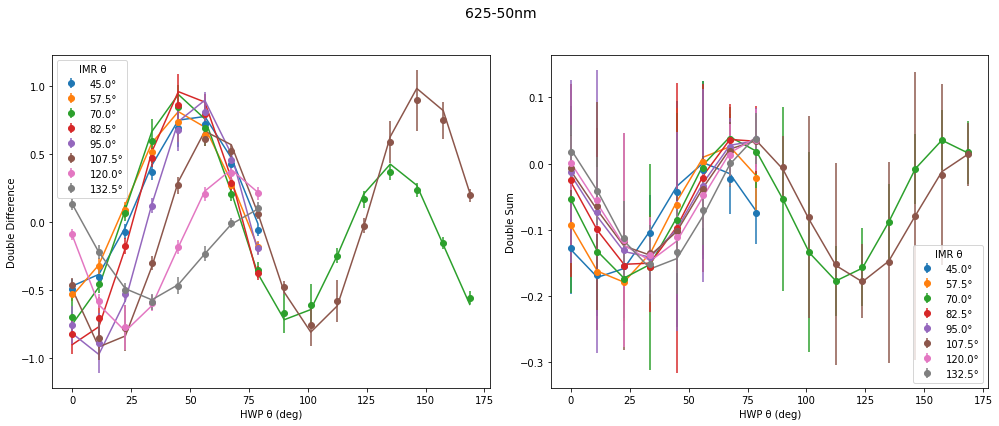

After p0: {'dichroic': {'phi': 0.7491629058745493, 'epsilon': 0.004222475164579179, 'theta': 6.807252753639669}, 'flc': {'phi': 2.9942652894656336, 'delta_theta': 4.823898608962046}, 'optics': {'phi': 0.24797550128064783, 'epsilon': 6.041405127978815e-07, 'theta': -29.092479114201332}, 'image_rotator': {'phi': 1.3580747375590165}, 'hwp': {'phi': 2.744539662757235, 'delta_theta': -1.8946959562536114}, 'lp': {'theta': -0.05973235505487677}}
{'dichroic': {'phi': 0.7491629058745493, 'epsilon': 0.004222475164579179, 'theta': 6.807252753639669}, 'flc': {'phi': 2.9942652894656336, 'delta_theta': 4.823898608962046}, 'optics': {'phi': 0.24797550128064783, 'epsilon': 6.041405127978815e-07, 'theta': -29.092479114201332}, 'image_rotator': {'phi': 1.3580747375590165}, 'hwp': {'phi': 2.744539662757235, 'delta_theta': -1.8946959562536114}, 'lp': {'theta': -0.05973235505487677}}
[[ 0.42351063  0.42350971 -0.00088304  0.        ]
 [ 0.42351063  0.42350971 -0.00088304  0.        ]
 [ 0.          0.     

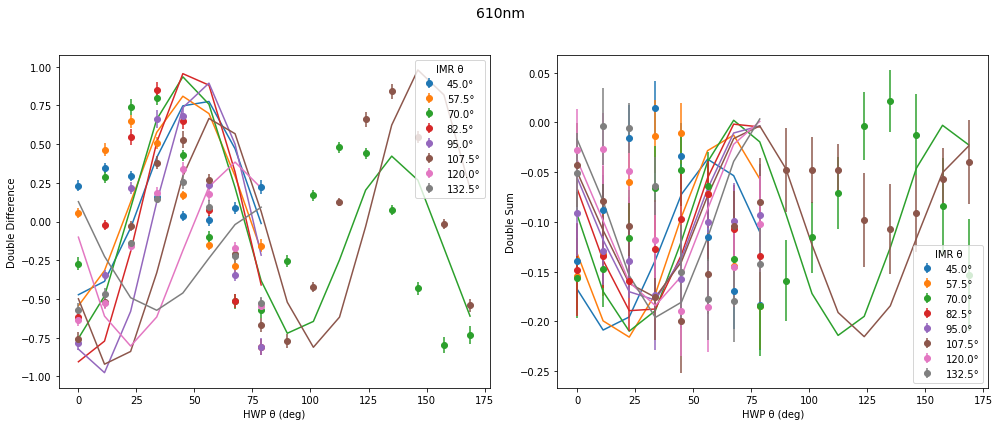

Before p0: {'dichroic': {'phi': 0.7491629058745493, 'epsilon': 0.004222475164579179, 'theta': 6.807252753639669}, 'flc': {'phi': 2.9942652894656336, 'delta_theta': 4.823898608962046}, 'optics': {'phi': 0.24797550128064783, 'epsilon': 6.041405127978815e-07, 'theta': -29.092479114201332}, 'image_rotator': {'phi': 1.3580747375590165}, 'hwp': {'phi': 2.744539662757235, 'delta_theta': -1.8946959562536114}, 'lp': {'theta': -0.05973235505487677}}
Iteration #: 1
logl_value: 491.1567682593651
Best Fit Parameters: [ 1.11297189e+00  5.39855083e-04 -5.40475809e+00  3.53490617e+00
 -1.61327273e+00  1.19514631e-02  8.79423853e-08 -9.00000000e+01
  1.41328519e+00  2.89519809e+00  3.61339399e+00 -3.43658627e+00]


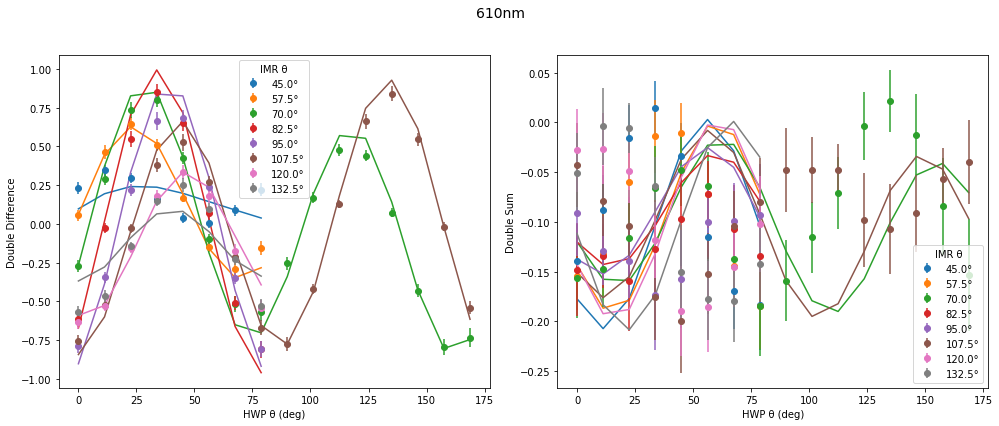

After p0: {'dichroic': {'phi': 1.112971889525964, 'epsilon': 0.0005398550834481552, 'theta': -5.40475808983966}, 'flc': {'phi': 3.5349061717625716, 'delta_theta': -1.6132727341774924}, 'optics': {'phi': 0.011951463137642816, 'epsilon': 8.794238531333549e-08, 'theta': -90.0}, 'image_rotator': {'phi': 1.4132851942358773}, 'hwp': {'phi': 2.8951980925846605, 'delta_theta': 3.613393992055988}, 'lp': {'theta': -3.4365862705552424}}
Before p0: {'dichroic': {'phi': 1.112971889525964, 'epsilon': 0.0005398550834481552, 'theta': -5.40475808983966}, 'flc': {'phi': 3.5349061717625716, 'delta_theta': -1.6132727341774924}, 'optics': {'phi': 0.011951463137642816, 'epsilon': 8.794238531333549e-08, 'theta': -90.0}, 'image_rotator': {'phi': 1.4132851942358773}, 'hwp': {'phi': 2.8951980925846605, 'delta_theta': 3.613393992055988}, 'lp': {'theta': -3.4365862705552424}}
Iteration #: 2
logl_value: 479.9982470272337
Best Fit Parameters: [ 1.96751690e-01  2.99700720e-04 -6.49030333e+01  3.51877571e+00
  2.7233

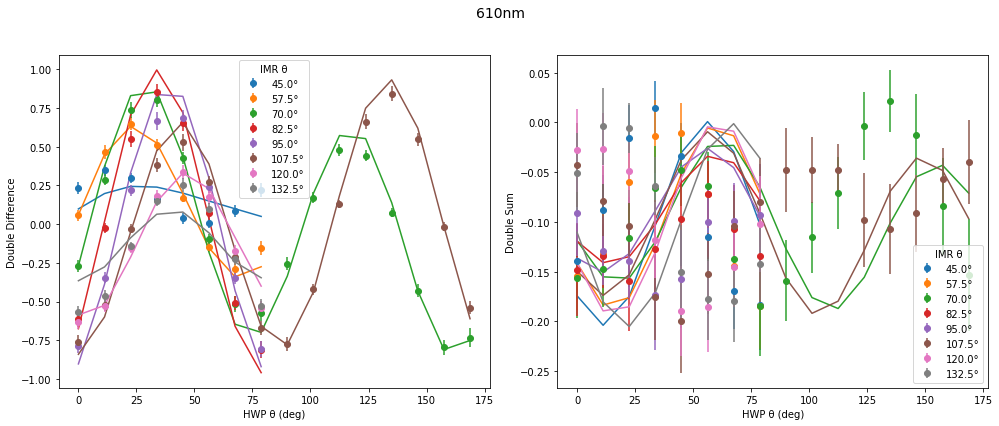

After p0: {'dichroic': {'phi': 0.19675169039741014, 'epsilon': 0.0002997007201627523, 'theta': -64.90303331432409}, 'flc': {'phi': 3.5187757078467383, 'delta_theta': 0.002723314403267011}, 'optics': {'phi': 0.0004797398885905981, 'epsilon': 0.00021473021261786488, 'theta': -90.0}, 'image_rotator': {'phi': 1.4141667349342373}, 'hwp': {'phi': 2.8896606375684275, 'delta_theta': 4.227416055662816}, 'lp': {'theta': -2.0539342263613456}}
Before p0: {'dichroic': {'phi': 0.19675169039741014, 'epsilon': 0.0002997007201627523, 'theta': -64.90303331432409}, 'flc': {'phi': 3.5187757078467383, 'delta_theta': 0.002723314403267011}, 'optics': {'phi': 0.0004797398885905981, 'epsilon': 0.00021473021261786488, 'theta': -90.0}, 'image_rotator': {'phi': 1.4141667349342373}, 'hwp': {'phi': 2.8896606375684275, 'delta_theta': 4.227416055662816}, 'lp': {'theta': -2.0539342263613456}}
Iteration #: 3
logl_value: 475.6354889103568
Best Fit Parameters: [ 3.39856262e-01  1.27062788e-02 -7.63539417e+01  3.52719248e

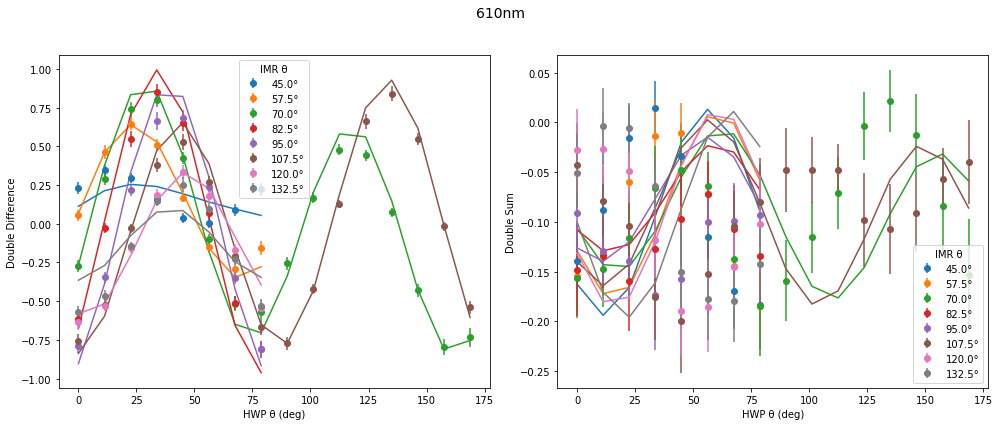

After p0: {'dichroic': {'phi': 0.33985626189296836, 'epsilon': 0.012706278808653094, 'theta': -76.35394167418062}, 'flc': {'phi': 3.527192483029382, 'delta_theta': 0.03955478521767024}, 'optics': {'phi': 1.8490803103944249e-06, 'epsilon': 0.0053497628449544615, 'theta': -90.0}, 'image_rotator': {'phi': 1.4146827595524178}, 'hwp': {'phi': 2.890185198806379, 'delta_theta': 3.7180540194966207}, 'lp': {'theta': -2.7727540014637304}}
{'dichroic': {'phi': 1.5904899902790914, 'epsilon': 7.262685077985205e-06, 'theta': 84.36298916775479}, 'flc': {'phi': 2.9618171563473474, 'delta_theta': 4.997405188476783}, 'optics': {'phi': 5.357476450121634, 'epsilon': 0.0016287319591159052, 'theta': 23.424057775412223}, 'image_rotator': {'phi': 2.011737597035337}, 'hwp': {'phi': 2.916377552543546, 'delta_theta': -1.377243285501816}, 'lp': {'theta': -0.22800057018256326}}
[[ 0.25426165  0.2542536  -0.00202358  0.        ]
 [ 0.25426165  0.2542536  -0.00202358  0.        ]
 [ 0.          0.          0.       

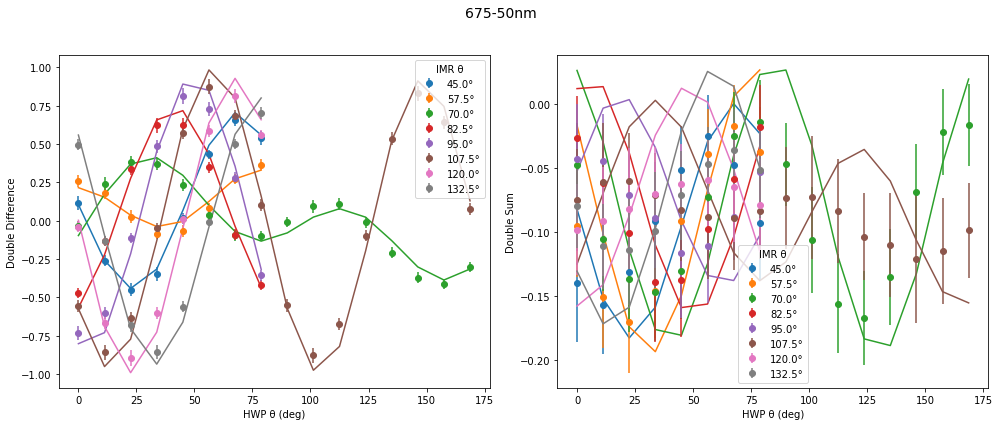

Before p0: {'dichroic': {'phi': 1.5904899902790914, 'epsilon': 7.262685077985205e-06, 'theta': 84.36298916775479}, 'flc': {'phi': 2.9618171563473474, 'delta_theta': 4.997405188476783}, 'optics': {'phi': 5.357476450121634, 'epsilon': 0.0016287319591159052, 'theta': 23.424057775412223}, 'image_rotator': {'phi': 2.011737597035337}, 'hwp': {'phi': 2.916377552543546, 'delta_theta': -1.377243285501816}, 'lp': {'theta': -0.22800057018256326}}
Iteration #: 1
logl_value: 71.66173963673006
Best Fit Parameters: [ 3.43458775e+00  6.48861162e-10  8.39470709e+01  3.28027287e+00
  4.99162173e+00  6.01971343e+00  1.75893718e-10  5.86328012e+01
  2.01143138e+00  2.91722822e+00 -1.32863272e+00 -1.28989015e-01]


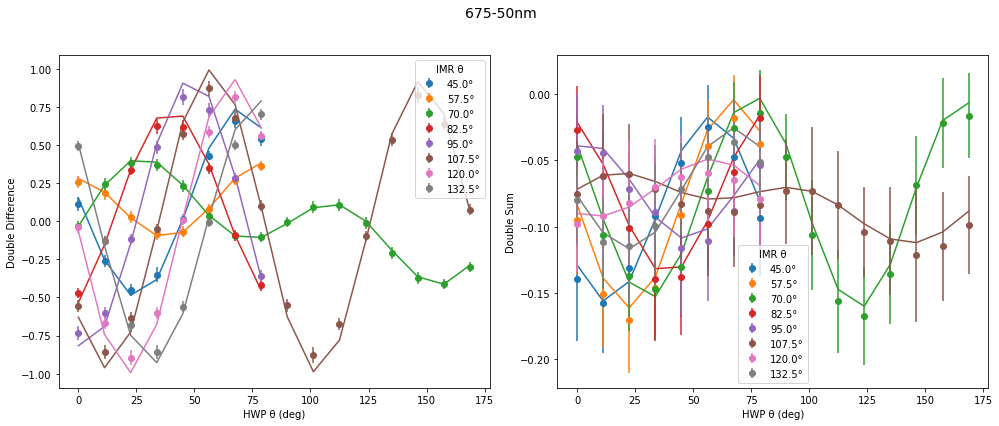

After p0: {'dichroic': {'phi': 3.4345877501715196, 'epsilon': 6.488611619241437e-10, 'theta': 83.94707086572086}, 'flc': {'phi': 3.2802728745999605, 'delta_theta': 4.99162173431046}, 'optics': {'phi': 6.019713433722094, 'epsilon': 1.7589371756761164e-10, 'theta': 58.632801229681476}, 'image_rotator': {'phi': 2.0114313766113967}, 'hwp': {'phi': 2.9172282241615375, 'delta_theta': -1.3286327171136172}, 'lp': {'theta': -0.1289890150397602}}
Before p0: {'dichroic': {'phi': 3.4345877501715196, 'epsilon': 6.488611619241437e-10, 'theta': 83.94707086572086}, 'flc': {'phi': 3.2802728745999605, 'delta_theta': 4.99162173431046}, 'optics': {'phi': 6.019713433722094, 'epsilon': 1.7589371756761164e-10, 'theta': 58.632801229681476}, 'image_rotator': {'phi': 2.0114313766113967}, 'hwp': {'phi': 2.9172282241615375, 'delta_theta': -1.3286327171136172}, 'lp': {'theta': -0.1289890150397602}}
Iteration #: 2
logl_value: 71.66156699513087
Best Fit Parameters: [ 3.44213900e+00  2.28553232e-10  8.39298370e+01  3

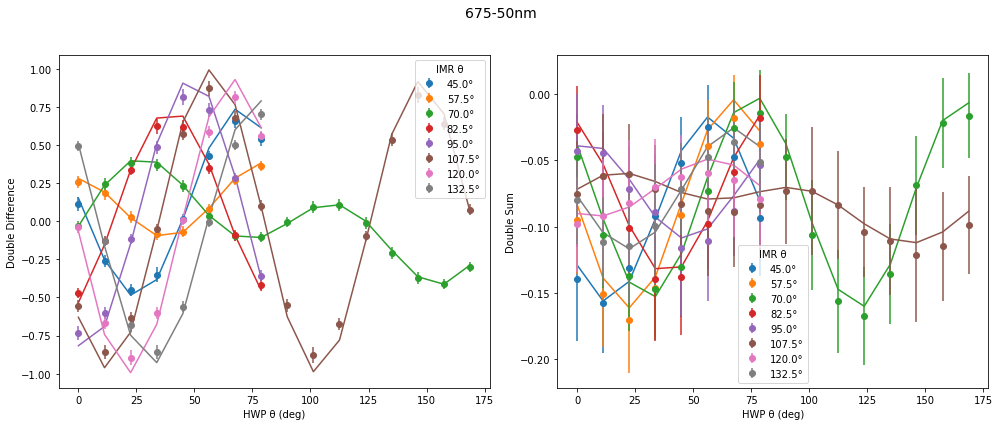

After p0: {'dichroic': {'phi': 3.4421390009014456, 'epsilon': 2.2855323153273537e-10, 'theta': 83.9298370375475}, 'flc': {'phi': 3.2823359937207215, 'delta_theta': 4.985679588043385}, 'optics': {'phi': 6.0200829948016334, 'epsilon': 3.158409361766013e-10, 'theta': 58.94170409307621}, 'image_rotator': {'phi': 2.011346330089048}, 'hwp': {'phi': 2.9172163481267592, 'delta_theta': -1.3532346241194695}, 'lp': {'theta': -0.1752903197109088}}
{'dichroic': {'phi': 3.4421390009014456, 'epsilon': 2.2855323153273537e-10, 'theta': 83.9298370375475}, 'flc': {'phi': 3.2823359937207215, 'delta_theta': 4.985679588043385}, 'optics': {'phi': 6.0200829948016334, 'epsilon': 3.158409361766013e-10, 'theta': 58.94170409307621}, 'image_rotator': {'phi': 2.011346330089048}, 'hwp': {'phi': 2.9172163481267592, 'delta_theta': -1.3532346241194695}, 'lp': {'theta': -0.1752903197109088}}
[[ 0.51539551  0.51538586 -0.00315358  0.        ]
 [ 0.51539551  0.51538586 -0.00315358  0.        ]
 [ 0.          0.          0

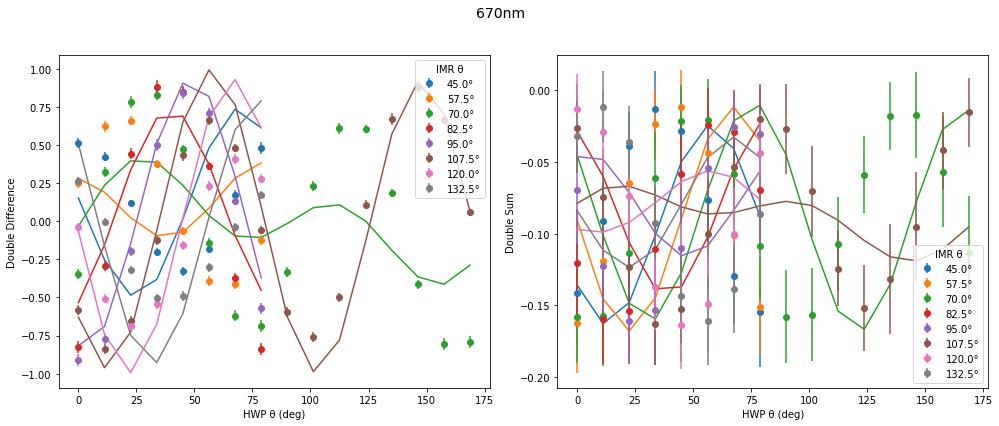

Before p0: {'dichroic': {'phi': 3.4421390009014456, 'epsilon': 2.2855323153273537e-10, 'theta': 83.9298370375475}, 'flc': {'phi': 3.2823359937207215, 'delta_theta': 4.985679588043385}, 'optics': {'phi': 6.0200829948016334, 'epsilon': 3.158409361766013e-10, 'theta': 58.94170409307621}, 'image_rotator': {'phi': 2.011346330089048}, 'hwp': {'phi': 2.9172163481267592, 'delta_theta': -1.3532346241194695}, 'lp': {'theta': -0.1752903197109088}}
Iteration #: 1
logl_value: 209.19058629538418
Best Fit Parameters: [ 5.78419935e+00  9.76847518e-11  8.92689345e+01  3.34999785e+00
  1.46159350e+00  6.27977529e+00  1.84291564e-10  8.75504494e+01
  1.98655237e+00  2.90688606e+00 -2.49843535e-01  2.86597817e-02]


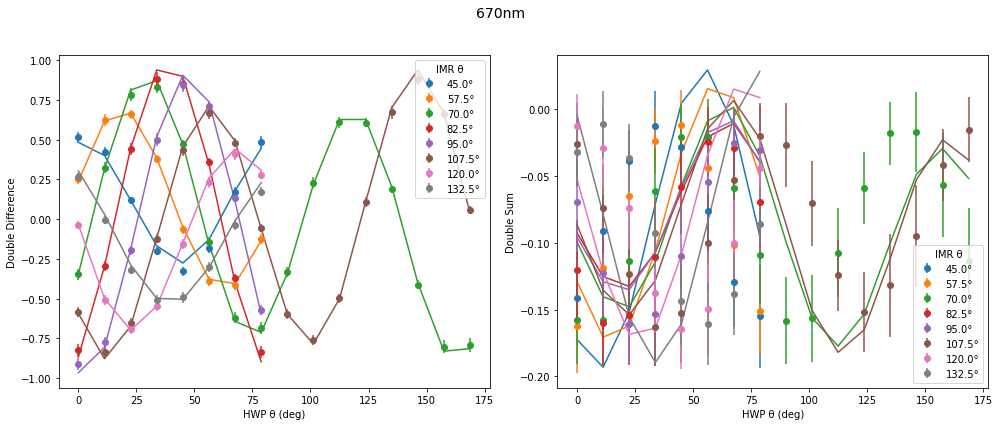

After p0: {'dichroic': {'phi': 5.784199354956643, 'epsilon': 9.768475179019335e-11, 'theta': 89.26893452696876}, 'flc': {'phi': 3.349997851770695, 'delta_theta': 1.4615934978090572}, 'optics': {'phi': 6.279775292535891, 'epsilon': 1.8429156376735425e-10, 'theta': 87.55044935328806}, 'image_rotator': {'phi': 1.9865523658548385}, 'hwp': {'phi': 2.9068860552547147, 'delta_theta': -0.24984353498782694}, 'lp': {'theta': 0.0286597817154485}}
Before p0: {'dichroic': {'phi': 5.784199354956643, 'epsilon': 9.768475179019335e-11, 'theta': 89.26893452696876}, 'flc': {'phi': 3.349997851770695, 'delta_theta': 1.4615934978090572}, 'optics': {'phi': 6.279775292535891, 'epsilon': 1.8429156376735425e-10, 'theta': 87.55044935328806}, 'image_rotator': {'phi': 1.9865523658548385}, 'hwp': {'phi': 2.9068860552547147, 'delta_theta': -0.24984353498782694}, 'lp': {'theta': 0.0286597817154485}}
Iteration #: 2
logl_value: 20.116603624925354
Best Fit Parameters: [ 1.10277606e+00  5.25205181e-11  8.96973634e+01  3.

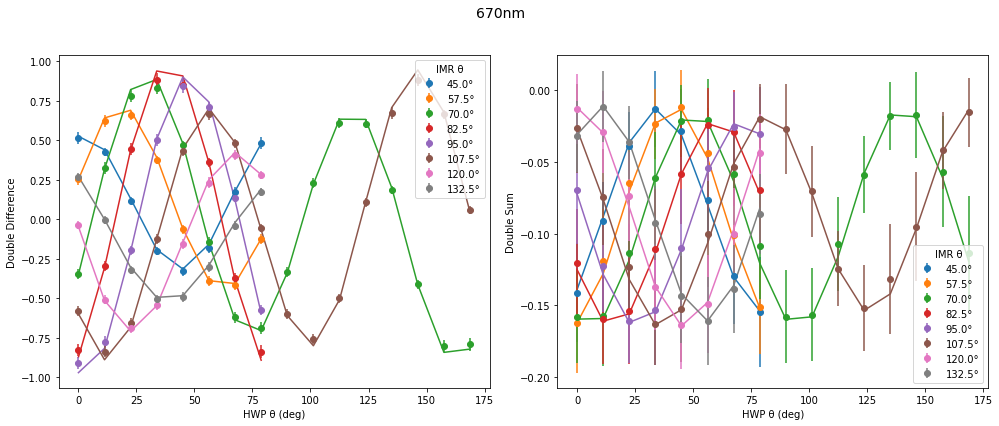

After p0: {'dichroic': {'phi': 1.102776062188957, 'epsilon': 5.252051807827523e-11, 'theta': 89.69736341591968}, 'flc': {'phi': 3.0404432101015155, 'delta_theta': -4.622855926656985}, 'optics': {'phi': 3.542481438815016, 'epsilon': 4.894715096159263e-10, 'theta': 86.00229479737885}, 'image_rotator': {'phi': 1.9872749326688004}, 'hwp': {'phi': 2.892663523366482, 'delta_theta': -1.2816330058475702}, 'lp': {'theta': -0.05039383633000476}}
Before p0: {'dichroic': {'phi': 1.102776062188957, 'epsilon': 5.252051807827523e-11, 'theta': 89.69736341591968}, 'flc': {'phi': 3.0404432101015155, 'delta_theta': -4.622855926656985}, 'optics': {'phi': 3.542481438815016, 'epsilon': 4.894715096159263e-10, 'theta': 86.00229479737885}, 'image_rotator': {'phi': 1.9872749326688004}, 'hwp': {'phi': 2.892663523366482, 'delta_theta': -1.2816330058475702}, 'lp': {'theta': -0.05039383633000476}}
Iteration #: 3
logl_value: 19.72693227730769
Best Fit Parameters: [ 1.00656259e+00  7.12903206e-10  8.96402447e+01  3.0

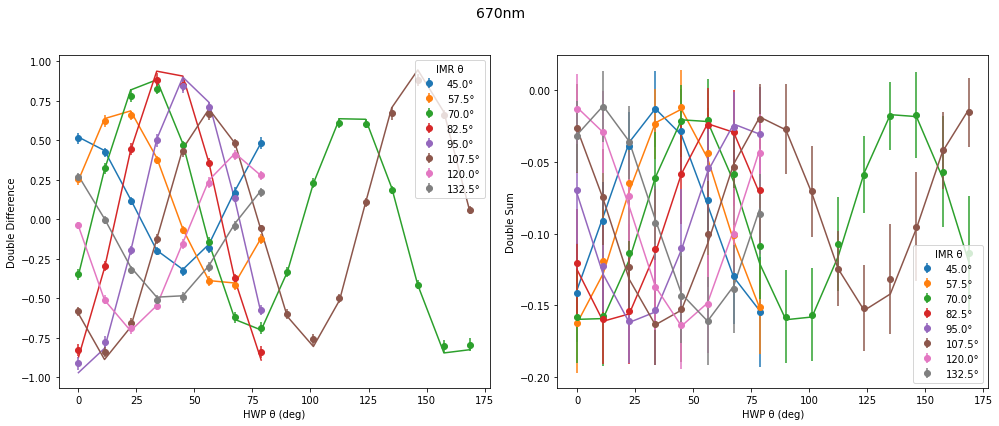

After p0: {'dichroic': {'phi': 1.0065625910666145, 'epsilon': 7.129032056562212e-10, 'theta': 89.64024472299525}, 'flc': {'phi': 3.0370235606496925, 'delta_theta': -4.668745353645548}, 'optics': {'phi': 3.537355042376242, 'epsilon': 1.1854836122527165e-09, 'theta': 85.97728123974127}, 'image_rotator': {'phi': 1.9877788346076615}, 'hwp': {'phi': 2.8919206938527653, 'delta_theta': -0.5320260309196119}, 'lp': {'theta': 1.4964959508774776}}
Before p0: {'dichroic': {'phi': 1.0065625910666145, 'epsilon': 7.129032056562212e-10, 'theta': 89.64024472299525}, 'flc': {'phi': 3.0370235606496925, 'delta_theta': -4.668745353645548}, 'optics': {'phi': 3.537355042376242, 'epsilon': 1.1854836122527165e-09, 'theta': 85.97728123974127}, 'image_rotator': {'phi': 1.9877788346076615}, 'hwp': {'phi': 2.8919206938527653, 'delta_theta': -0.5320260309196119}, 'lp': {'theta': 1.4964959508774776}}
Iteration #: 4
logl_value: 19.726609639651883
Best Fit Parameters: [ 1.90347947e+00  4.86137105e-06  8.97380547e+01  

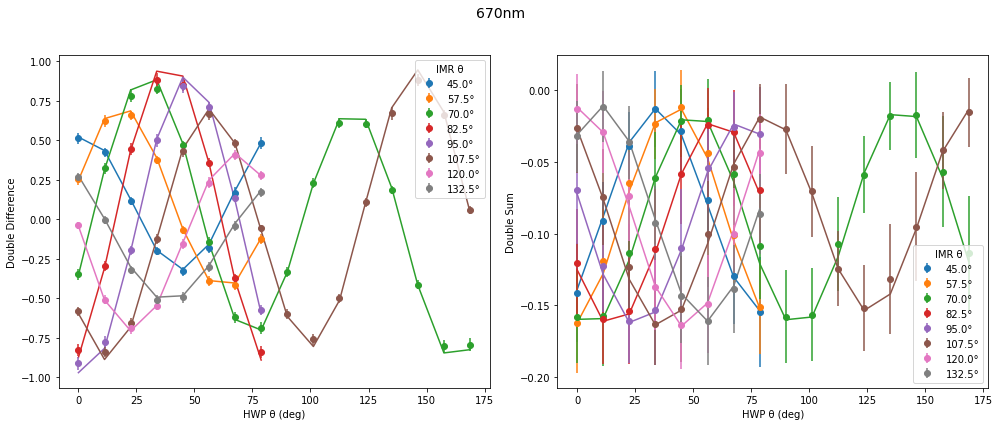

After p0: {'dichroic': {'phi': 1.903479465168367, 'epsilon': 4.861371045360464e-06, 'theta': 89.73805473515102}, 'flc': {'phi': 3.040500387242756, 'delta_theta': -4.954642384595264}, 'optics': {'phi': 3.5337305517994446, 'epsilon': 2.3148273143534895e-07, 'theta': 85.76790973546443}, 'image_rotator': {'phi': 1.9877718250832137}, 'hwp': {'phi': 2.891901053414048, 'delta_theta': -0.5376438224460627}, 'lp': {'theta': 1.4852100169530829}}
{'dichroic': {'phi': 0.04657407633330854, 'epsilon': 0.009215048532957102, 'theta': -23.158759656185616}, 'flc': {'phi': 3.313675578660007, 'delta_theta': 4.151977710988376}, 'optics': {'phi': 0.5718785261894699, 'epsilon': 0.0056790966677306536, 'theta': -38.047000331353814}, 'image_rotator': {'phi': 2.8924796223389935}, 'hwp': {'phi': 3.0348369326297915, 'delta_theta': 3.3873033455411328}, 'lp': {'theta': 4.998240753911732}}
[[0.01030974 0.01015322 0.00178964 0.        ]
 [0.01030974 0.01015322 0.00178964 0.        ]
 [0.         0.         0.         0

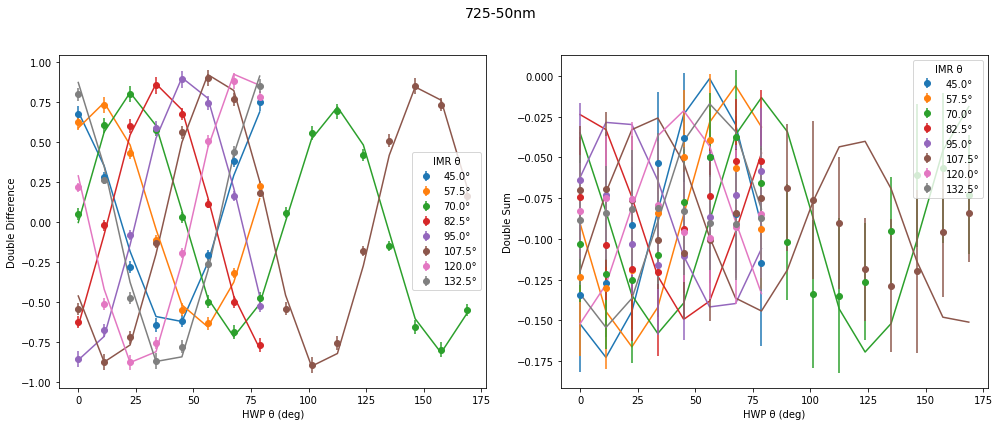

Before p0: {'dichroic': {'phi': 0.04657407633330854, 'epsilon': 0.009215048532957102, 'theta': -23.158759656185616}, 'flc': {'phi': 3.313675578660007, 'delta_theta': 4.151977710988376}, 'optics': {'phi': 0.5718785261894699, 'epsilon': 0.0056790966677306536, 'theta': -38.047000331353814}, 'image_rotator': {'phi': 2.8924796223389935}, 'hwp': {'phi': 3.0348369326297915, 'delta_theta': 3.3873033455411328}, 'lp': {'theta': 4.998240753911732}}
Iteration #: 1
logl_value: 23.44802909323447
Best Fit Parameters: [ 4.76405225e-01  7.93410514e-03 -7.77788952e+00  3.44881901e+00
  4.99200854e+00  9.79526759e-01  3.05649403e-03 -1.14005518e+01
  2.87905512e+00  3.02831596e+00  4.96917591e+00  3.98844010e+00]


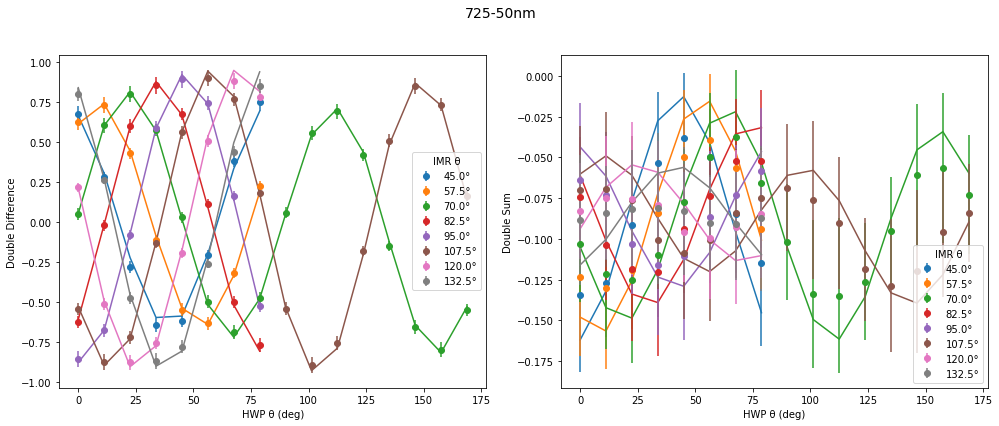

After p0: {'dichroic': {'phi': 0.47640522544881536, 'epsilon': 0.007934105138716254, 'theta': -7.777889517887438}, 'flc': {'phi': 3.4488190111733132, 'delta_theta': 4.992008542986831}, 'optics': {'phi': 0.9795267585442895, 'epsilon': 0.0030564940306089207, 'theta': -11.40055181283628}, 'image_rotator': {'phi': 2.8790551226448855}, 'hwp': {'phi': 3.0283159588641464, 'delta_theta': 4.969175912961539}, 'lp': {'theta': 3.9884400999705534}}
Before p0: {'dichroic': {'phi': 0.47640522544881536, 'epsilon': 0.007934105138716254, 'theta': -7.777889517887438}, 'flc': {'phi': 3.4488190111733132, 'delta_theta': 4.992008542986831}, 'optics': {'phi': 0.9795267585442895, 'epsilon': 0.0030564940306089207, 'theta': -11.40055181283628}, 'image_rotator': {'phi': 2.8790551226448855}, 'hwp': {'phi': 3.0283159588641464, 'delta_theta': 4.969175912961539}, 'lp': {'theta': 3.9884400999705534}}
Iteration #: 2
logl_value: 15.6512080504248
Best Fit Parameters: [ 2.99781393  0.0068091  -5.47442288  3.18701102  4.89

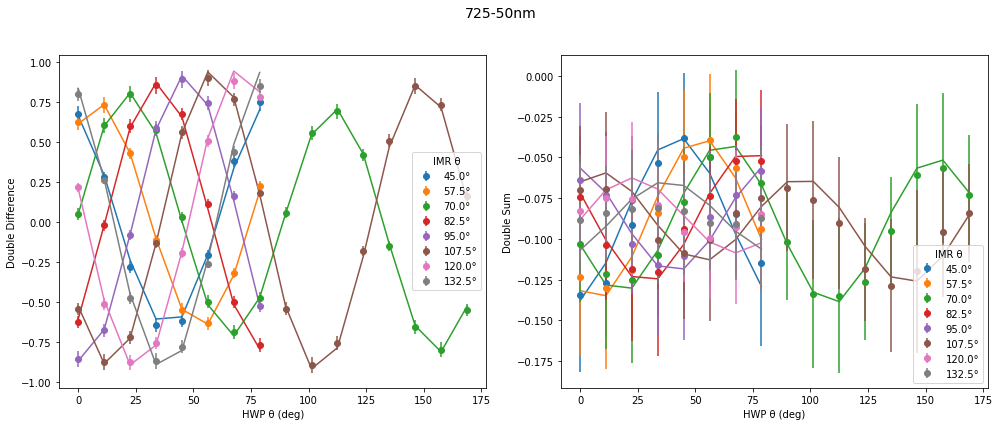

After p0: {'dichroic': {'phi': 2.997813933161897, 'epsilon': 0.0068091020692125775, 'theta': -5.474422883315594}, 'flc': {'phi': 3.187011018764453, 'delta_theta': 4.898137626240869}, 'optics': {'phi': 1.4603296835422972, 'epsilon': 0.01057426173867515, 'theta': 3.889906166477644}, 'image_rotator': {'phi': 2.8950446981580207}, 'hwp': {'phi': 3.0299609724537184, 'delta_theta': 4.73632548661282}, 'lp': {'theta': 4.979004197182139}}
Before p0: {'dichroic': {'phi': 2.997813933161897, 'epsilon': 0.0068091020692125775, 'theta': -5.474422883315594}, 'flc': {'phi': 3.187011018764453, 'delta_theta': 4.898137626240869}, 'optics': {'phi': 1.4603296835422972, 'epsilon': 0.01057426173867515, 'theta': 3.889906166477644}, 'image_rotator': {'phi': 2.8950446981580207}, 'hwp': {'phi': 3.0299609724537184, 'delta_theta': 4.73632548661282}, 'lp': {'theta': 4.979004197182139}}
Iteration #: 3
logl_value: 13.99933770446812
Best Fit Parameters: [ 3.13574353  0.00744367 -6.36383089  3.15387509  4.9997764   1.426

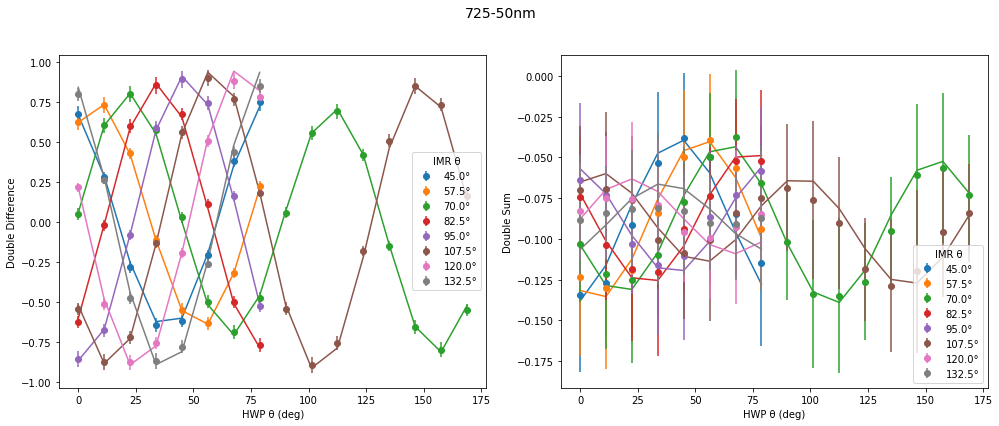

After p0: {'dichroic': {'phi': 3.135743529617728, 'epsilon': 0.007443665847294731, 'theta': -6.363830893856177}, 'flc': {'phi': 3.1538750865046916, 'delta_theta': 4.99977639869652}, 'optics': {'phi': 1.4260552216926499, 'epsilon': 0.007228881474122737, 'theta': 6.304189648453125}, 'image_rotator': {'phi': 2.893012642169375}, 'hwp': {'phi': 3.02793650229106, 'delta_theta': 3.30623335889977}, 'lp': {'theta': 4.895579550471176}}
Before p0: {'dichroic': {'phi': 3.135743529617728, 'epsilon': 0.007443665847294731, 'theta': -6.363830893856177}, 'flc': {'phi': 3.1538750865046916, 'delta_theta': 4.99977639869652}, 'optics': {'phi': 1.4260552216926499, 'epsilon': 0.007228881474122737, 'theta': 6.304189648453125}, 'image_rotator': {'phi': 2.893012642169375}, 'hwp': {'phi': 3.02793650229106, 'delta_theta': 3.30623335889977}, 'lp': {'theta': 4.895579550471176}}
Iteration #: 4
logl_value: 13.984146721541453
Best Fit Parameters: [ 3.10298139  0.0074457  -6.79739131  3.1607693   4.81393385  1.46213321

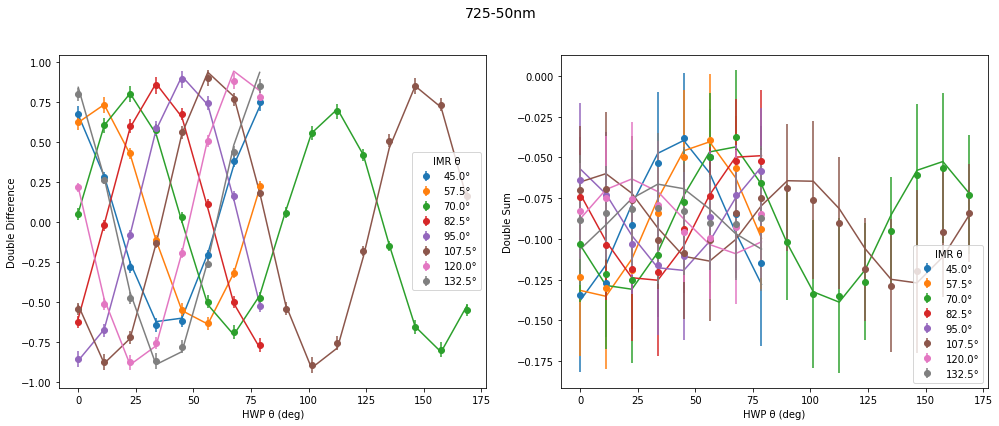

After p0: {'dichroic': {'phi': 3.102981392059611, 'epsilon': 0.0074456953637078716, 'theta': -6.797391307319103}, 'flc': {'phi': 3.160769297323453, 'delta_theta': 4.813933848781367}, 'optics': {'phi': 1.4621332100416327, 'epsilon': 0.007119592871854451, 'theta': 6.863918011010629}, 'image_rotator': {'phi': 2.893195619361345}, 'hwp': {'phi': 3.0279905093127706, 'delta_theta': 3.352702211025001}, 'lp': {'theta': 4.999469046250159}}
{'dichroic': {'phi': 3.102981392059611, 'epsilon': 0.0074456953637078716, 'theta': -6.797391307319103}, 'flc': {'phi': 3.160769297323453, 'delta_theta': 4.813933848781367}, 'optics': {'phi': 1.4621332100416327, 'epsilon': 0.007119592871854451, 'theta': 6.863918011010629}, 'image_rotator': {'phi': 2.893195619361345}, 'hwp': {'phi': 3.0279905093127706, 'delta_theta': 3.352702211025001}, 'lp': {'theta': 4.999469046250159}}
[[0.53461613 0.52649583 0.09282536 0.        ]
 [0.53461613 0.52649583 0.09282536 0.        ]
 [0.         0.         0.         0.        ]
 

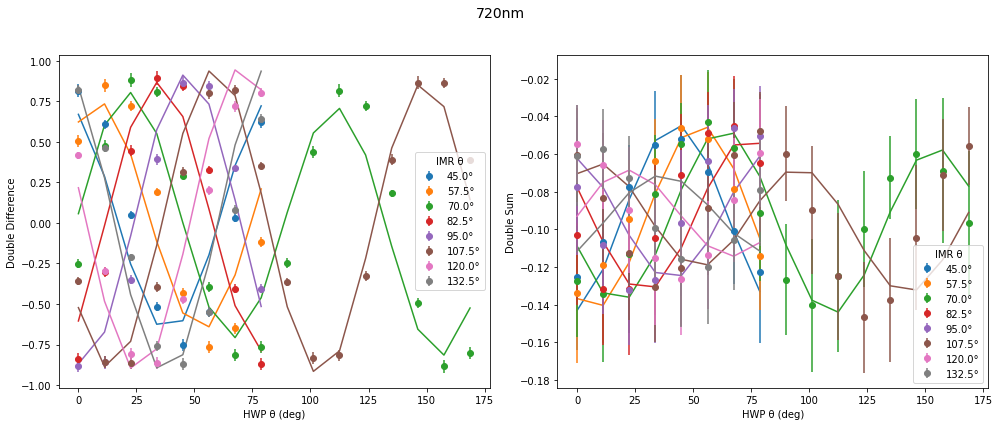

Before p0: {'dichroic': {'phi': 3.102981392059611, 'epsilon': 0.0074456953637078716, 'theta': -6.797391307319103}, 'flc': {'phi': 3.160769297323453, 'delta_theta': 4.813933848781367}, 'optics': {'phi': 1.4621332100416327, 'epsilon': 0.007119592871854451, 'theta': 6.863918011010629}, 'image_rotator': {'phi': 2.893195619361345}, 'hwp': {'phi': 3.0279905093127706, 'delta_theta': 3.352702211025001}, 'lp': {'theta': 4.999469046250159}}
Iteration #: 1
logl_value: 121.67486139224013
Best Fit Parameters: [ 3.10977428e+00  4.42146238e-03 -1.01035362e+01  3.12126567e+00
  3.28860992e+00  2.35833810e+00  1.97221860e-02  2.92344026e+00
  2.99219734e+00  3.08911045e+00  4.98211854e+00 -4.66700419e+00]


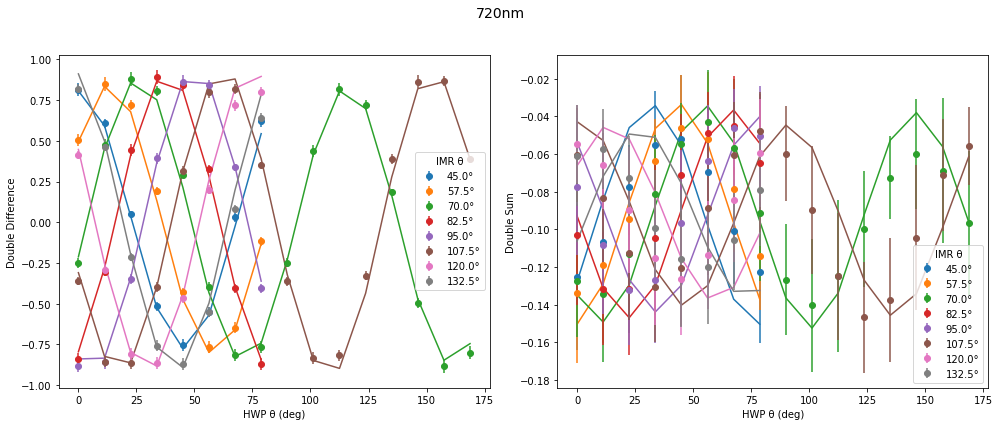

After p0: {'dichroic': {'phi': 3.10977428324341, 'epsilon': 0.0044214623774073755, 'theta': -10.103536203900955}, 'flc': {'phi': 3.121265671871007, 'delta_theta': 3.2886099216766187}, 'optics': {'phi': 2.358338099846864, 'epsilon': 0.019722186019257334, 'theta': 2.9234402619344335}, 'image_rotator': {'phi': 2.9921973390901764}, 'hwp': {'phi': 3.089110447390767, 'delta_theta': 4.982118540183231}, 'lp': {'theta': -4.667004192544672}}
Before p0: {'dichroic': {'phi': 3.10977428324341, 'epsilon': 0.0044214623774073755, 'theta': -10.103536203900955}, 'flc': {'phi': 3.121265671871007, 'delta_theta': 3.2886099216766187}, 'optics': {'phi': 2.358338099846864, 'epsilon': 0.019722186019257334, 'theta': 2.9234402619344335}, 'image_rotator': {'phi': 2.9921973390901764}, 'hwp': {'phi': 3.089110447390767, 'delta_theta': 4.982118540183231}, 'lp': {'theta': -4.667004192544672}}
Iteration #: 2
logl_value: 119.78375768380333
Best Fit Parameters: [ 3.13363893e+00  1.58987278e-03 -1.00379016e+01  3.12921410

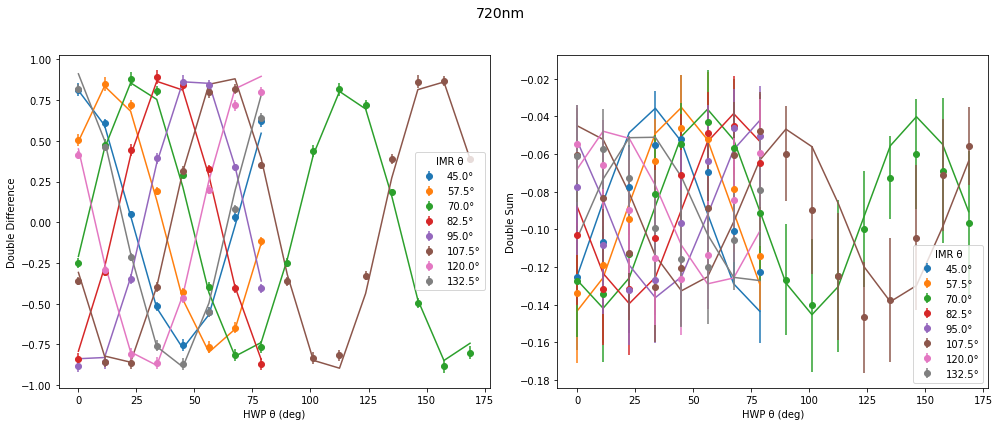

After p0: {'dichroic': {'phi': 3.1336389342460804, 'epsilon': 0.001589872778037444, 'theta': -10.037901610402146}, 'flc': {'phi': 3.1292141027728118, 'delta_theta': -1.1057278359281528}, 'optics': {'phi': 2.1698445183182273, 'epsilon': 0.01772784883807378, 'theta': -2.2509460747451655}, 'image_rotator': {'phi': 2.9979568037889}, 'hwp': {'phi': 3.0848117550364345, 'delta_theta': 4.999992954180451}, 'lp': {'theta': -3.960995031455271}}
Before p0: {'dichroic': {'phi': 3.1336389342460804, 'epsilon': 0.001589872778037444, 'theta': -10.037901610402146}, 'flc': {'phi': 3.1292141027728118, 'delta_theta': -1.1057278359281528}, 'optics': {'phi': 2.1698445183182273, 'epsilon': 0.01772784883807378, 'theta': -2.2509460747451655}, 'image_rotator': {'phi': 2.9979568037889}, 'hwp': {'phi': 3.0848117550364345, 'delta_theta': 4.999992954180451}, 'lp': {'theta': -3.960995031455271}}
Iteration #: 3
logl_value: 117.7107148617082
Best Fit Parameters: [ 3.12942190e+00  2.04177278e-03 -1.16594850e+01  3.14357

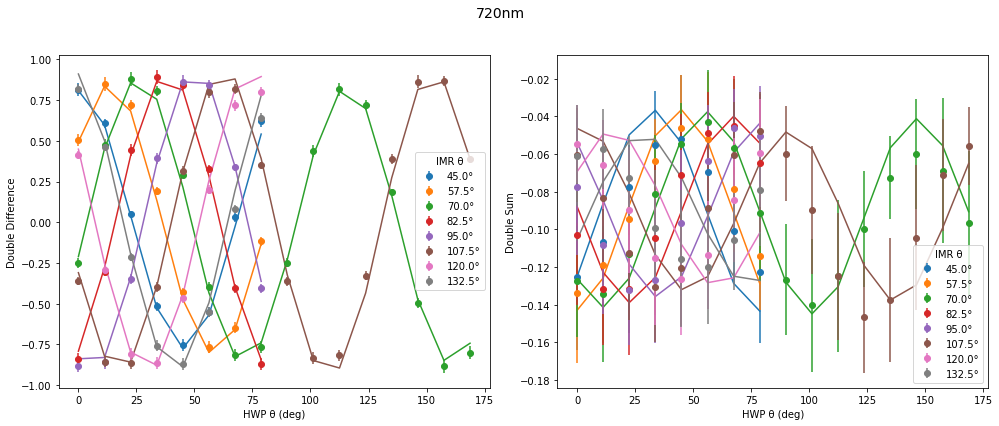

After p0: {'dichroic': {'phi': 3.129421896383611, 'epsilon': 0.0020417727776966803, 'theta': -11.65948499748171}, 'flc': {'phi': 3.14357814019381, 'delta_theta': -4.998138700207576}, 'optics': {'phi': 2.066603907132917, 'epsilon': 0.017771495062963855, 'theta': -5.616854604069101}, 'image_rotator': {'phi': 2.9966010792914775}, 'hwp': {'phi': 3.0866017903347887, 'delta_theta': 4.957523273651816}, 'lp': {'theta': -4.999975584802543}}
Before p0: {'dichroic': {'phi': 3.129421896383611, 'epsilon': 0.0020417727776966803, 'theta': -11.65948499748171}, 'flc': {'phi': 3.14357814019381, 'delta_theta': -4.998138700207576}, 'optics': {'phi': 2.066603907132917, 'epsilon': 0.017771495062963855, 'theta': -5.616854604069101}, 'image_rotator': {'phi': 2.9966010792914775}, 'hwp': {'phi': 3.0866017903347887, 'delta_theta': 4.957523273651816}, 'lp': {'theta': -4.999975584802543}}
Iteration #: 4
logl_value: 117.42522773970026
Best Fit Parameters: [ 3.14394289e+00  1.74304904e-03 -1.97654863e-01  3.14715624

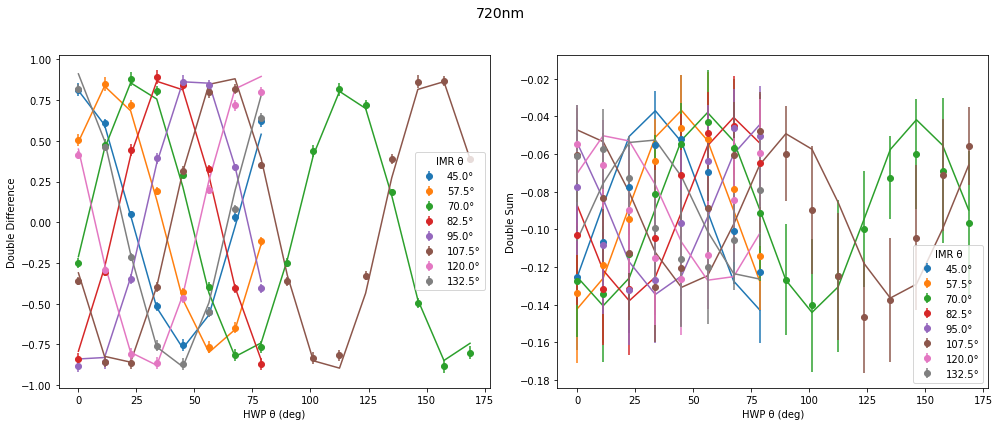

After p0: {'dichroic': {'phi': 3.1439428920031185, 'epsilon': 0.0017430490379128829, 'theta': -0.19765486323707404}, 'flc': {'phi': 3.147156237749588, 'delta_theta': 4.944064440740483}, 'optics': {'phi': 1.9713916502015212, 'epsilon': 0.017891780857265206, 'theta': -7.746333031246376}, 'image_rotator': {'phi': 2.995058114462092}, 'hwp': {'phi': 3.0856687735901263, 'delta_theta': 4.99987080970137}, 'lp': {'theta': -4.9999998933341745}}
{'dichroic': {'phi': 0.0012161168629994282, 'epsilon': 0.2746942151071867, 'theta': 44.17575191657403}, 'flc': {'phi': 3.2772447119627355, 'delta_theta': 2.682659656507889}, 'optics': {'phi': 0.9768240984047845, 'epsilon': 0.00020481064054627307, 'theta': -67.70126401431378}, 'image_rotator': {'phi': 3.067178312979175}, 'hwp': {'phi': 2.976646220357839, 'delta_theta': -2.3819803438300546}, 'lp': {'theta': -3.017577060681715}}
[[ 0.59120058  0.5879239  -0.06215802  0.        ]
 [ 0.59120058  0.5879239  -0.06215802  0.        ]
 [ 0.          0.          0.

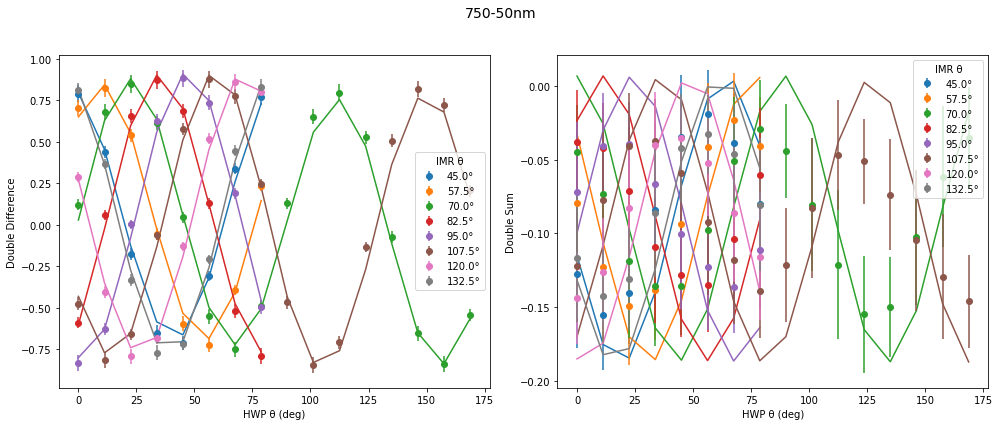

Before p0: {'dichroic': {'phi': 0.0012161168629994282, 'epsilon': 0.2746942151071867, 'theta': 44.17575191657403}, 'flc': {'phi': 3.2772447119627355, 'delta_theta': 2.682659656507889}, 'optics': {'phi': 0.9768240984047845, 'epsilon': 0.00020481064054627307, 'theta': -67.70126401431378}, 'image_rotator': {'phi': 3.067178312979175}, 'hwp': {'phi': 2.976646220357839, 'delta_theta': -2.3819803438300546}, 'lp': {'theta': -3.017577060681715}}
Iteration #: 1
logl_value: 41.61625990890305
Best Fit Parameters: [ 2.69538553e-03  2.44069624e-01  4.40648901e+01  3.18938865e+00
  3.70165942e+00  5.86036727e-01  7.09075879e-04 -2.60166711e+01
  3.06109403e+00  2.99095295e+00  1.08763338e+00 -3.49206612e+00]


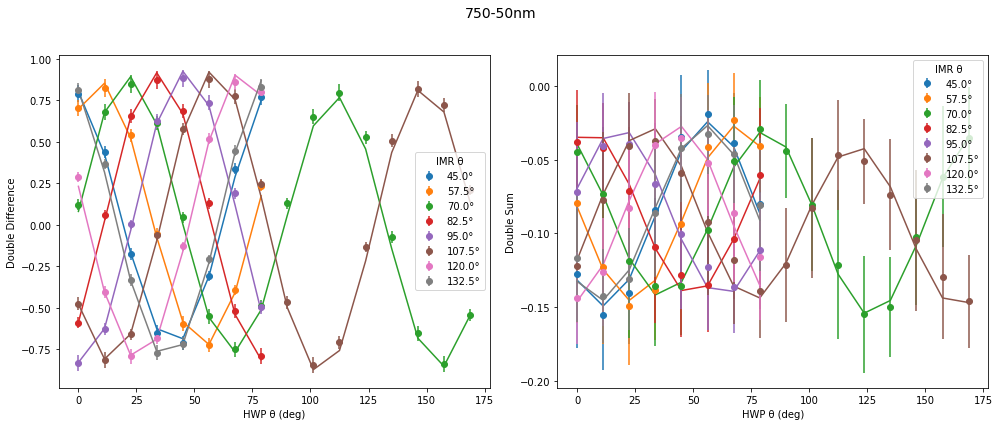

After p0: {'dichroic': {'phi': 0.002695385525540087, 'epsilon': 0.24406962446556935, 'theta': 44.06489011594584}, 'flc': {'phi': 3.189388647412853, 'delta_theta': 3.7016594176172717}, 'optics': {'phi': 0.5860367266439703, 'epsilon': 0.0007090758789024172, 'theta': -26.016671062313975}, 'image_rotator': {'phi': 3.0610940278359404}, 'hwp': {'phi': 2.99095295122292, 'delta_theta': 1.087633381108339}, 'lp': {'theta': -3.4920661188273545}}
Before p0: {'dichroic': {'phi': 0.002695385525540087, 'epsilon': 0.24406962446556935, 'theta': 44.06489011594584}, 'flc': {'phi': 3.189388647412853, 'delta_theta': 3.7016594176172717}, 'optics': {'phi': 0.5860367266439703, 'epsilon': 0.0007090758789024172, 'theta': -26.016671062313975}, 'image_rotator': {'phi': 3.0610940278359404}, 'hwp': {'phi': 2.99095295122292, 'delta_theta': 1.087633381108339}, 'lp': {'theta': -3.4920661188273545}}
Iteration #: 2
logl_value: 39.723117048138604
Best Fit Parameters: [ 8.65052349e-03  3.14587531e-01  4.42365730e+01  3.19

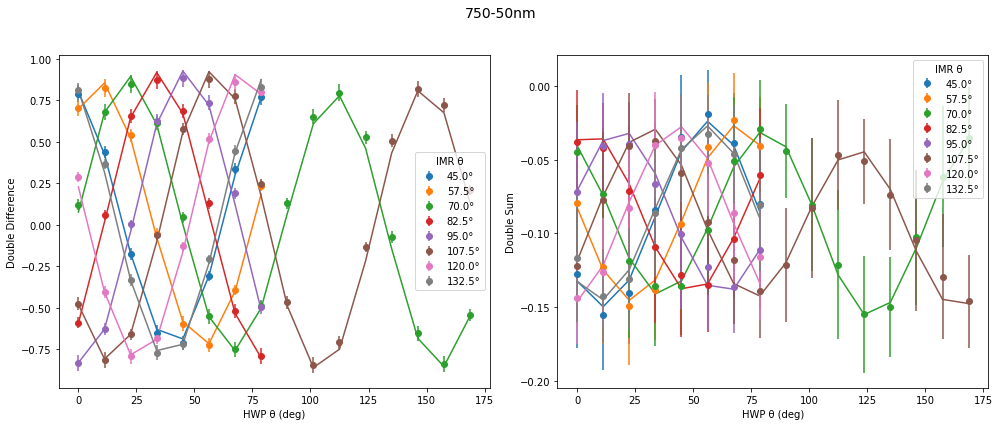

After p0: {'dichroic': {'phi': 0.008650523490785475, 'epsilon': 0.3145875314150619, 'theta': 44.23657295098391}, 'flc': {'phi': 3.190063126993177, 'delta_theta': 4.999766304153475}, 'optics': {'phi': 0.5149826930588428, 'epsilon': 8.581982456172619e-05, 'theta': -24.870582304268865}, 'image_rotator': {'phi': 3.0595664290635103}, 'hwp': {'phi': 2.976253775391264, 'delta_theta': 0.8313936754773281}, 'lp': {'theta': -0.8956337266016865}}
Before p0: {'dichroic': {'phi': 0.008650523490785475, 'epsilon': 0.3145875314150619, 'theta': 44.23657295098391}, 'flc': {'phi': 3.190063126993177, 'delta_theta': 4.999766304153475}, 'optics': {'phi': 0.5149826930588428, 'epsilon': 8.581982456172619e-05, 'theta': -24.870582304268865}, 'image_rotator': {'phi': 3.0595664290635103}, 'hwp': {'phi': 2.976253775391264, 'delta_theta': 0.8313936754773281}, 'lp': {'theta': -0.8956337266016865}}
Iteration #: 3
logl_value: 39.479780617094846
Best Fit Parameters: [ 1.32634872e-02  3.04448861e-01  4.42454877e+01  3.16

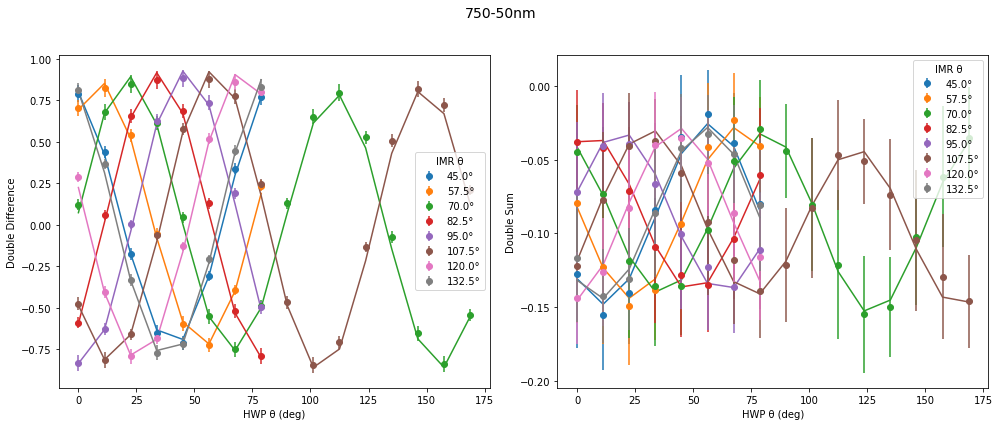

After p0: {'dichroic': {'phi': 0.013263487219527765, 'epsilon': 0.3044488605208061, 'theta': 44.24548770538547}, 'flc': {'phi': 3.169809157217803, 'delta_theta': 4.9949624130040196}, 'optics': {'phi': 0.5506236740719965, 'epsilon': 9.915986105306325e-08, 'theta': -21.803857071203446}, 'image_rotator': {'phi': 3.0657914238693795}, 'hwp': {'phi': 2.977976462205242, 'delta_theta': 2.7864351840059216}, 'lp': {'theta': 2.542399099330229}}
{'dichroic': {'phi': 0.013263487219527765, 'epsilon': 0.3044488605208061, 'theta': 44.24548770538547}, 'flc': {'phi': 3.169809157217803, 'delta_theta': 4.9949624130040196}, 'optics': {'phi': 0.5506236740719965, 'epsilon': 9.915986105306325e-08, 'theta': -21.803857071203446}, 'image_rotator': {'phi': 3.0657914238693795}, 'hwp': {'phi': 2.977976462205242, 'delta_theta': 2.7864351840059216}, 'lp': {'theta': 2.542399099330229}}
[[0.21604611 0.21519589 0.01914817 0.        ]
 [0.21604611 0.21519589 0.01914817 0.        ]
 [0.         0.         0.         0.   

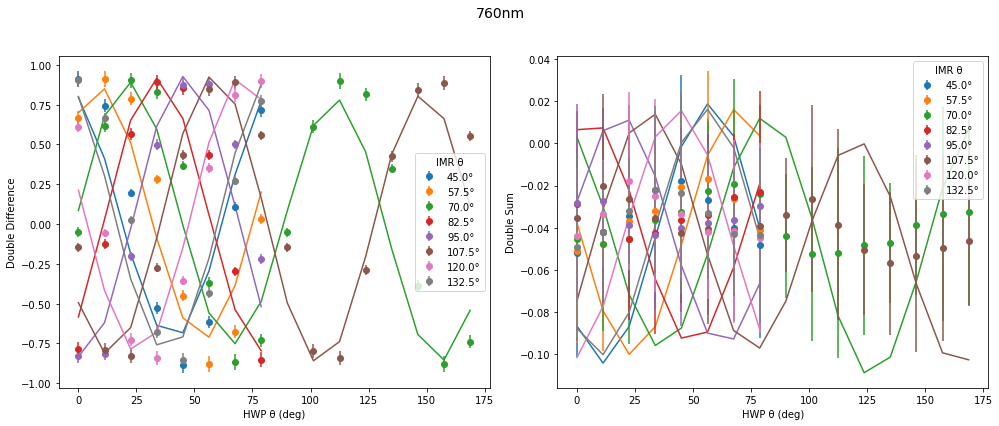

Before p0: {'dichroic': {'phi': 0.013263487219527765, 'epsilon': 0.3044488605208061, 'theta': 44.24548770538547}, 'flc': {'phi': 3.169809157217803, 'delta_theta': 4.9949624130040196}, 'optics': {'phi': 0.5506236740719965, 'epsilon': 9.915986105306325e-08, 'theta': -21.803857071203446}, 'image_rotator': {'phi': 3.0657914238693795}, 'hwp': {'phi': 2.977976462205242, 'delta_theta': 2.7864351840059216}, 'lp': {'theta': 2.542399099330229}}
Iteration #: 1
logl_value: 304.94969332543883
Best Fit Parameters: [ 1.02006715e-02  2.36326887e-01  4.43141235e+01  3.08869430e+00
  3.35864649e+00  1.89189378e+00  1.07974593e-09 -5.72451940e+00
  3.14707826e+00  2.90775754e+00  4.98832183e+00  1.80944764e+00]


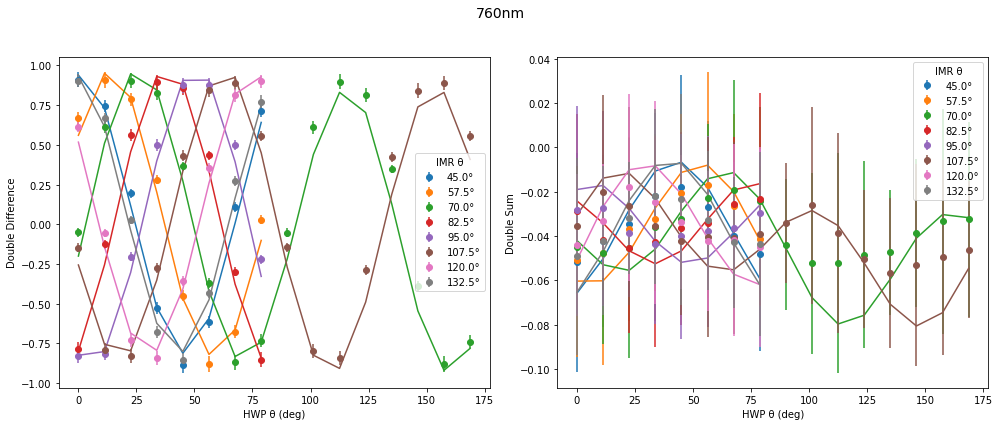

After p0: {'dichroic': {'phi': 0.010200671467940667, 'epsilon': 0.2363268874895612, 'theta': 44.3141235434494}, 'flc': {'phi': 3.088694302464237, 'delta_theta': 3.3586464892498302}, 'optics': {'phi': 1.891893782375572, 'epsilon': 1.0797459337054577e-09, 'theta': -5.724519399588889}, 'image_rotator': {'phi': 3.147078264937047}, 'hwp': {'phi': 2.9077575447517763, 'delta_theta': 4.988321833879802}, 'lp': {'theta': 1.8094476420832217}}
Before p0: {'dichroic': {'phi': 0.010200671467940667, 'epsilon': 0.2363268874895612, 'theta': 44.3141235434494}, 'flc': {'phi': 3.088694302464237, 'delta_theta': 3.3586464892498302}, 'optics': {'phi': 1.891893782375572, 'epsilon': 1.0797459337054577e-09, 'theta': -5.724519399588889}, 'image_rotator': {'phi': 3.147078264937047}, 'hwp': {'phi': 2.9077575447517763, 'delta_theta': 4.988321833879802}, 'lp': {'theta': 1.8094476420832217}}
Iteration #: 2
logl_value: 303.6200577813792
Best Fit Parameters: [ 9.40249601e-02  2.46973261e-01  4.43288066e+01  2.94962298e

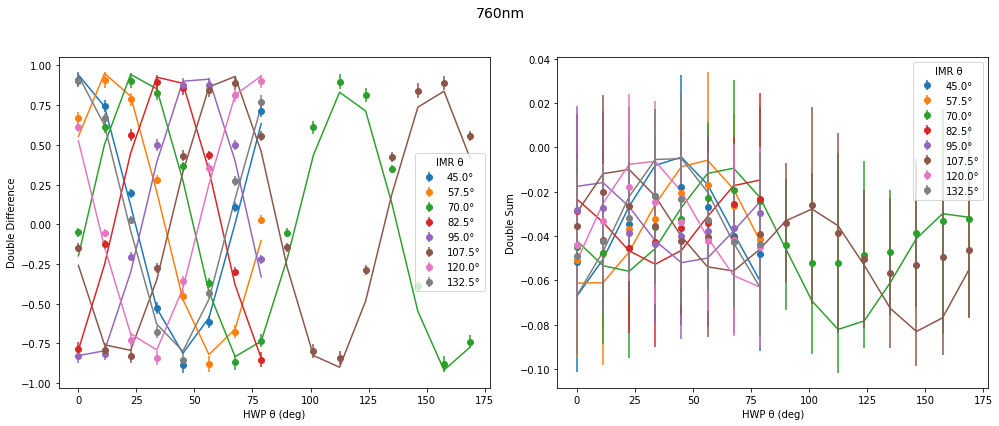

After p0: {'dichroic': {'phi': 0.09402496011591496, 'epsilon': 0.24697326129855218, 'theta': 44.32880655843263}, 'flc': {'phi': 2.9496229791937463, 'delta_theta': 3.635397470070748}, 'optics': {'phi': 1.7973531606623623, 'epsilon': 1.5675794746159036e-09, 'theta': -4.810442445329139}, 'image_rotator': {'phi': 3.147280573087725}, 'hwp': {'phi': 2.907699960053436, 'delta_theta': 4.8321149864062996}, 'lp': {'theta': 1.6574780093537327}}
{'dichroic': {'phi': 1.3764243819248705, 'epsilon': 0.002704207405255751, 'theta': 7.254640119333228}, 'flc': {'phi': 2.632458460684317, 'delta_theta': 4.395796688939583}, 'optics': {'phi': 0.6411787275576513, 'epsilon': 1.1176067851459513e-07, 'theta': -17.116911324181473}, 'image_rotator': {'phi': 3.165689224407034}, 'hwp': {'phi': 2.8950593774410223, 'delta_theta': 4.965787403276952}, 'lp': {'theta': 1.1294517466411973}}
[[0.49271441 0.49233153 0.01942038 0.        ]
 [0.49271441 0.49233153 0.01942038 0.        ]
 [0.         0.         0.         0.   

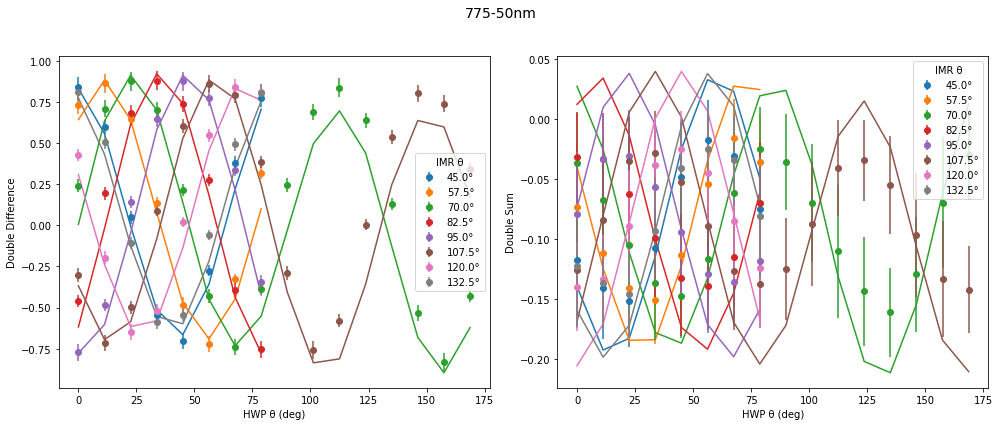

Before p0: {'dichroic': {'phi': 1.3764243819248705, 'epsilon': 0.002704207405255751, 'theta': 7.254640119333228}, 'flc': {'phi': 2.632458460684317, 'delta_theta': 4.395796688939583}, 'optics': {'phi': 0.6411787275576513, 'epsilon': 1.1176067851459513e-07, 'theta': -17.116911324181473}, 'image_rotator': {'phi': 3.165689224407034}, 'hwp': {'phi': 2.8950593774410223, 'delta_theta': 4.965787403276952}, 'lp': {'theta': 1.1294517466411973}}
Iteration #: 1
logl_value: 358.9900273207579
Best Fit Parameters: [ 2.64382881e-04  3.59003576e-03 -1.60117813e+00  3.13662533e+00
  2.43497429e+00  8.02340007e-01  5.30362735e-08 -2.53075716e+01
  3.16679361e+00  2.89457859e+00  4.83795038e+00  1.19665769e+00]


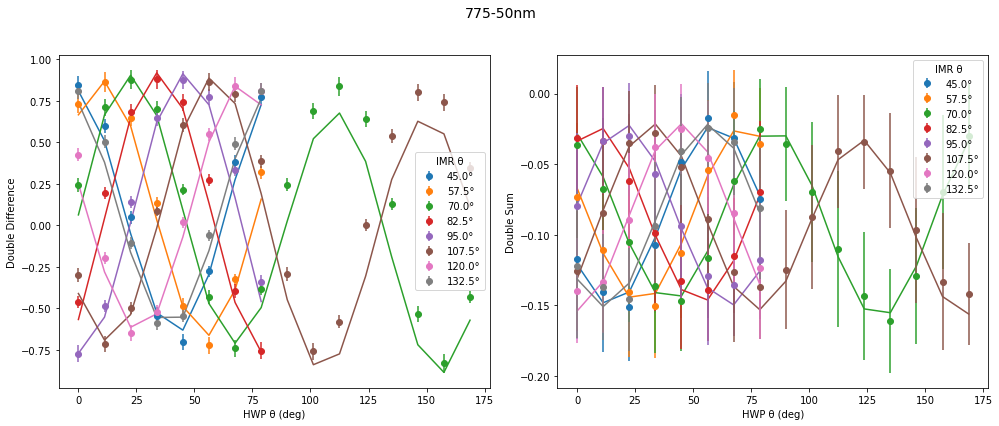

After p0: {'dichroic': {'phi': 0.00026438288082977844, 'epsilon': 0.003590035757402651, 'theta': -1.6011781294243126}, 'flc': {'phi': 3.1366253348661104, 'delta_theta': 2.4349742874490126}, 'optics': {'phi': 0.8023400072374147, 'epsilon': 5.303627351174828e-08, 'theta': -25.307571567316913}, 'image_rotator': {'phi': 3.1667936139274513}, 'hwp': {'phi': 2.894578591402217, 'delta_theta': 4.8379503766447645}, 'lp': {'theta': 1.1966576879305126}}
Before p0: {'dichroic': {'phi': 0.00026438288082977844, 'epsilon': 0.003590035757402651, 'theta': -1.6011781294243126}, 'flc': {'phi': 3.1366253348661104, 'delta_theta': 2.4349742874490126}, 'optics': {'phi': 0.8023400072374147, 'epsilon': 5.303627351174828e-08, 'theta': -25.307571567316913}, 'image_rotator': {'phi': 3.1667936139274513}, 'hwp': {'phi': 2.894578591402217, 'delta_theta': 4.8379503766447645}, 'lp': {'theta': 1.1966576879305126}}
Iteration #: 2
logl_value: 358.5748607481448
Best Fit Parameters: [ 3.28773265e-04  1.06750980e-02  4.13398

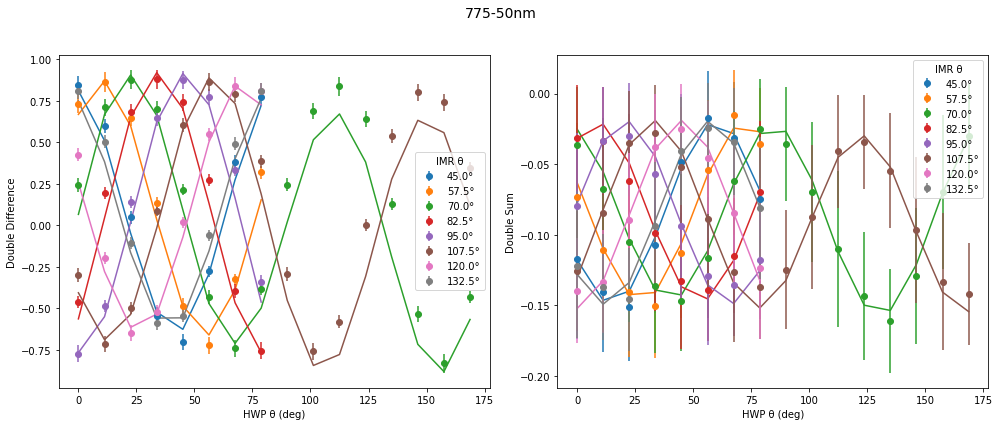

After p0: {'dichroic': {'phi': 0.00032877326534854227, 'epsilon': 0.010675097962407471, 'theta': 41.339846373885564}, 'flc': {'phi': 3.141965411093958, 'delta_theta': 1.5403283157607417}, 'optics': {'phi': 0.757865436735556, 'epsilon': 0.0, 'theta': -29.296927781749815}, 'image_rotator': {'phi': 3.160635754067348}, 'hwp': {'phi': 2.8935603315573584, 'delta_theta': 4.9996356230189924}, 'lp': {'theta': 0.5265737041177898}}


In [3]:
# Defining wavelength
for i, wavelength in enumerate(wavelengths):
    interleaved_values, interleaved_stds, configuration_list = inst.read_csv(file_path, 
        obs_mode = obs_modes[i], obs_filter = wavelength, flc_a_theta = 0, flc_b_theta = 43)

    if obs_modes[i] == "IPOL":
        filename = previous_fits_directory + wavelength + "nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"

    # Using closest broadband files    
    with open(filename, "r") as f:
        past_fit = json.load(f)
    print(past_fit)

    theta_pol = past_fit["lp"]["theta"]
    delta_HWP = past_fit["hwp"]["phi"] 
    offset_HWP = past_fit["hwp"]["delta_theta"]
    delta_derot = past_fit["image_rotator"]["phi"] 
    delta_opts = past_fit["optics"]["phi"]
    epsilon_opts = past_fit["optics"]["epsilon"]
    rot_opts = past_fit["optics"]["theta"]
    delta_dichroic = past_fit["dichroic"]["phi"]
    epsilon_dichroic = past_fit["dichroic"]["epsilon"]
    rot_dichroic = past_fit["dichroic"]["theta"]
    delta_FLC = past_fit["flc"]["phi"] 
    rot_FLC = past_fit["flc"]["delta_theta"]
    em_gain = em_gains[i] # from EM gain measurements

    # NOTE: Components must be listed downstream to upstream
    # Define the instrument configuration as a system dictionary
    system_dict = {
        "components": {
            "wollaston": {
                "type": "wollaston_prism_function",
                "properties": {"beam": "o", "transmission_ratio": em_gain},
            },
            "dichroic": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': delta_dichroic, 
                    'epsilon': epsilon_dichroic, 'theta': rot_dichroic},
            },
            "flc": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_FLC, "theta": 0, "delta_theta": rot_FLC},
            },
            "optics": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': 2 * np.pi * delta_opts, 
                    'epsilon': epsilon_opts, 'theta': rot_opts},
            },
            "image_rotator": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_derot, "theta": 0, "delta_theta": 0},
            },
            "hwp": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_HWP, "theta": 0, "delta_theta": offset_HWP},
            },
            "lp": {
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"theta": theta_pol},
            },
        }
    }

    # Turn dictionary into matrix
    system_mm = inst.generate_system_mueller_matrix(system_dict)
    print(system_mm.evaluate())

    # Set-up for p0
    p0 = {
    # "wollaston": {"transmission_ratio": em_gain}, 
    "dichroic": {"phi": np.abs(delta_dichroic), 
                 "epsilon": epsilon_dichroic, 
                 "theta": rot_dichroic},
    "flc": {"phi": delta_FLC, "delta_theta": rot_FLC},
    "optics": {"phi": np.abs(delta_opts), "epsilon": epsilon_opts, "theta": rot_opts},
    "image_rotator": {
                    "phi": delta_derot, 
                    # "delta_theta": 0
                    },
    "hwp": {"phi": delta_HWP, "delta_theta": offset_HWP},
    "lp": {"theta": theta_pol}
    }

    # Adding p0
    p0_values, p0_keywords = inst.parse_configuration(p0)
    s_in = np.array([1, 0, 0, 0])
    logl_value = inst.logl(p0_values, p0_keywords, system_mm, interleaved_values, interleaved_stds, configuration_list,
        s_in=s_in, logl_function=None, process_dataset=inst.process_dataset, process_errors=inst.process_errors, 
        process_model=inst.process_model)
    print("logl value: " + str(logl_value))

    # Plotting intial plot
    updated_system_mm = inst.update_system_mm(p0_values, p0_keywords, system_mm)
    model = inst.model(p0_values, p0_keywords, system_mm, configuration_list, 
        process_model = inst.process_model)

    inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
        configuration_list, wavelength = wavelength)

    # Iterative Fitting
    # Unpolarized light for s_in as there is LP in the system already
    s_in = np.array([1, 0, 0, 0])

    # Counters for iterative fitting
    iteration = 1
    previous_logl_value = 1000000
    new_logl_value = 0

    while abs(previous_logl_value - new_logl_value) > 0.01 * abs(previous_logl_value):
        print("Before p0: " + str(p0))
        if iteration > 1: 
            previous_logl_value = new_logl_value
        result, new_logl_value = inst.minimize_system_mueller_matrix(p0, system_mm, 
            interleaved_values, interleaved_stds, configuration_list, s_in = s_in,
            process_dataset = inst.process_dataset, 
            process_errors = inst.process_errors, 
            process_model = inst.process_model, bounds = bounds)
        
        # Print statements
        print("Iteration #: " + str(iteration))
        print("logl_value: " + str(new_logl_value))
        print("Best Fit Parameters: " + str(result.x))

        # Making a plot
        updated_system_mm = inst.update_system_mm(result.x, p0_keywords, system_mm)
        model = inst.model(result.x, p0_keywords, updated_system_mm, configuration_list, 
        process_model = inst.process_model)

        save_path = save_fits_directory + str(wavelength) + "nm_no_IMR_offset_or_IMR_and_HWP_constraints_FLC_0_to_43.png"
        inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
            configuration_list, wavelength = wavelength, save_path = save_path)

        # Updating p0 for next time
        inst.update_p0(p0, result.x)
        print("After p0: " + str(p0))

        iteration += 1

        filename = save_fits_directory + str(wavelength) + "nm_no_IMR_offset_or_IMR_and_HWP_constraints_FLC_0_to_43.txt"
        with open(filename, 'w') as f:
            json.dump(p0, f, indent=4)




I just killed my family todAY :)